In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Road.csv')

In [3]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
# Sample of the dataset to understand its structure
print(df.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [5]:
# Data cleaning and preprocessing
# Convert 'Time' to datetime to extract hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

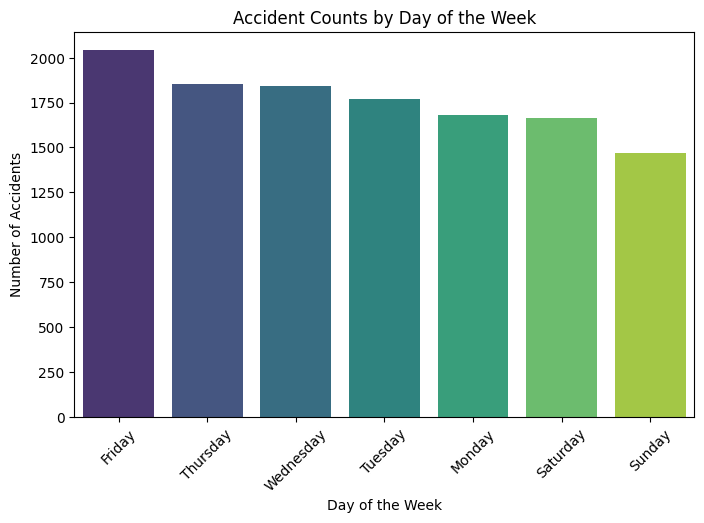

In [6]:
# 1. Analyzing accident counts by day of the week
day_of_week_counts = df['Day_of_week'].value_counts().reset_index()
day_of_week_counts.columns = ['Day_of_week', 'Count']
plt.figure(figsize=(8, 5))
sns.barplot(x='Day_of_week', y='Count', data=day_of_week_counts, palette='viridis', hue='Day_of_week', dodge=False, legend=False)
plt.title('Accident Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

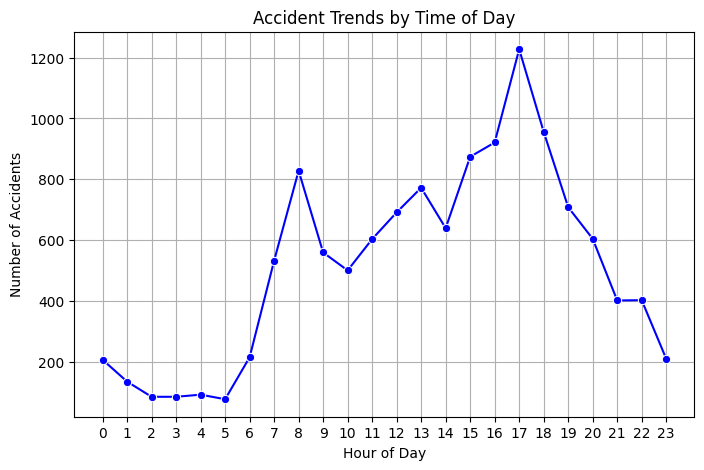

In [7]:
## 2. Analyzing accident counts by time of day
hourly_accidents = df['Time'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values, marker='o', color='b')
plt.title('Accident Trends by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(np.arange(0, 24, step=1))
plt.show()

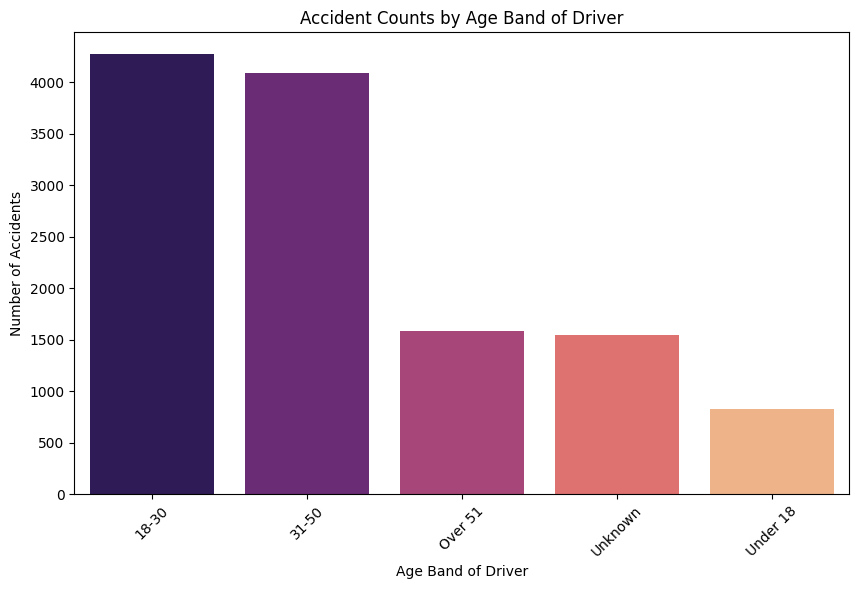

In [8]:
# 3. Analyzing accident counts by age band of driver
age_band_counts = df['Age_band_of_driver'].value_counts().reset_index()
age_band_counts.columns = ['Age_band_of_driver', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_band_of_driver', y='Count', data=age_band_counts, palette='magma', hue='Age_band_of_driver', dodge=False, legend=False)
plt.title('Accident Counts by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

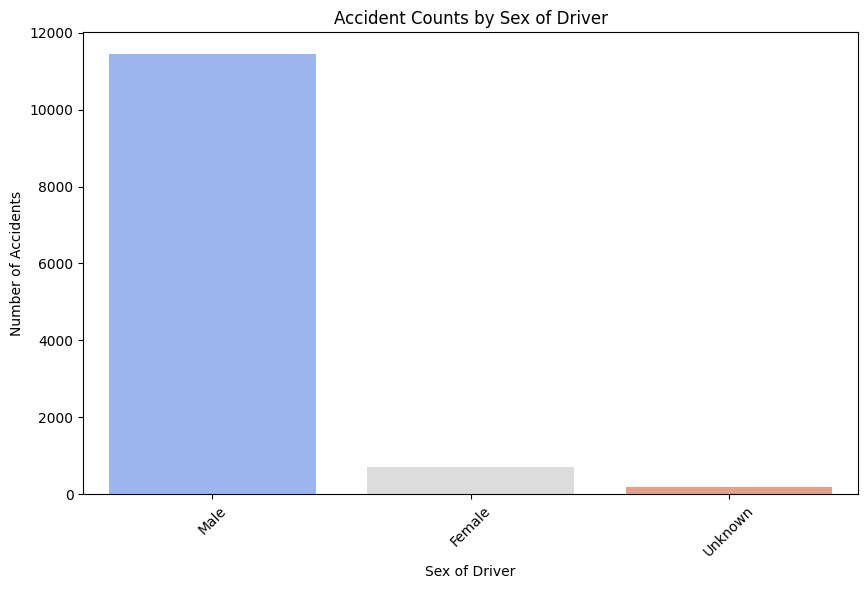

In [9]:
# 4. Analyzing accident counts by sex of driver
sex_counts = df['Sex_of_driver'].value_counts().reset_index()
sex_counts.columns = ['Sex_of_driver', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_of_driver', y='Count', data=sex_counts, palette='coolwarm', hue='Sex_of_driver', dodge=False, legend=False)
plt.title('Accident Counts by Sex of Driver')
plt.xlabel('Sex of Driver')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

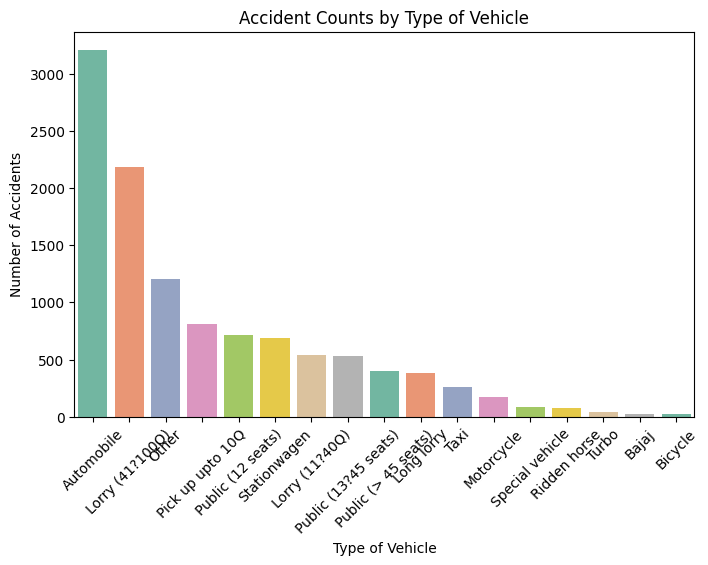

In [17]:
# 5. Analyzing accident counts by type of vehicle
vehicle_type_counts = df['Type_of_vehicle'].value_counts().reset_index()
vehicle_type_counts.columns = ['Type_of_vehicle', 'Count']
plt.figure(figsize=(8, 5))
sns.barplot(x='Type_of_vehicle', y='Count', data=vehicle_type_counts, palette='Set2', hue='Type_of_vehicle', dodge=False, legend=False)
plt.title('Accident Counts by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


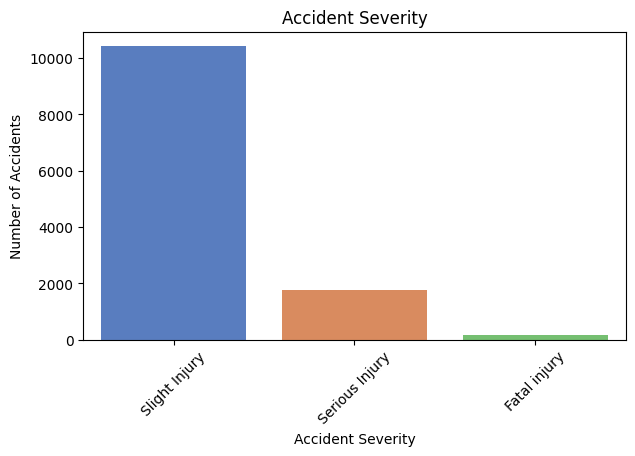

In [11]:
# 6. Analyzing accident severity
severity_counts = df['Accident_severity'].value_counts().reset_index()
severity_counts.columns = ['Accident_severity', 'Count']
plt.figure(figsize=(7, 4))
sns.barplot(x='Accident_severity', y='Count', data=severity_counts, palette='muted', hue='Accident_severity', dodge=False, legend=False)
plt.title('Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

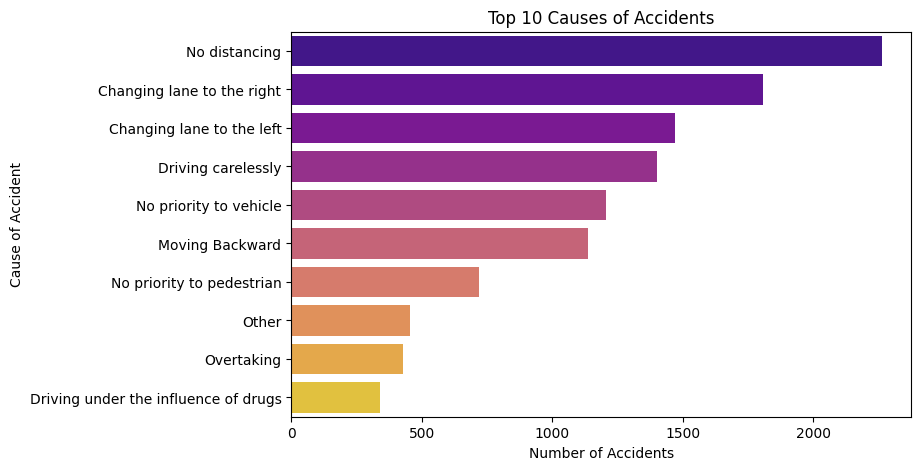

In [12]:
# 7. Analyzing causes of accidents
cause_counts = df['Cause_of_accident'].value_counts().nlargest(10).reset_index()
cause_counts.columns = ['Cause_of_accident', 'Count']
plt.figure(figsize=(8, 5))
sns.barplot(x='Count', y='Cause_of_accident', data=cause_counts, palette='plasma', hue='Cause_of_accident', dodge=False, legend=False)
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause of Accident')
plt.show()

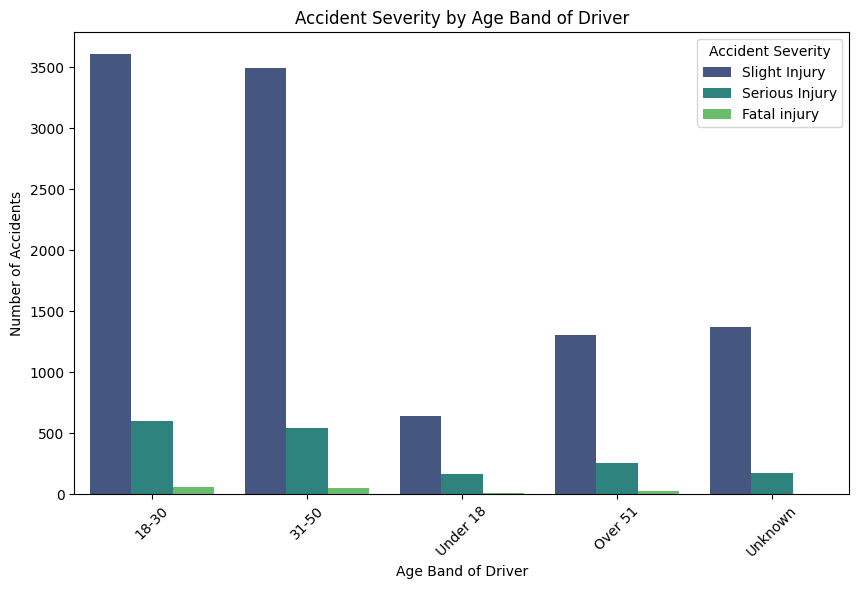

In [13]:
# 8. Analyzing accident severity by age band of driver
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df, palette='viridis')
plt.title('Accident Severity by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.show()

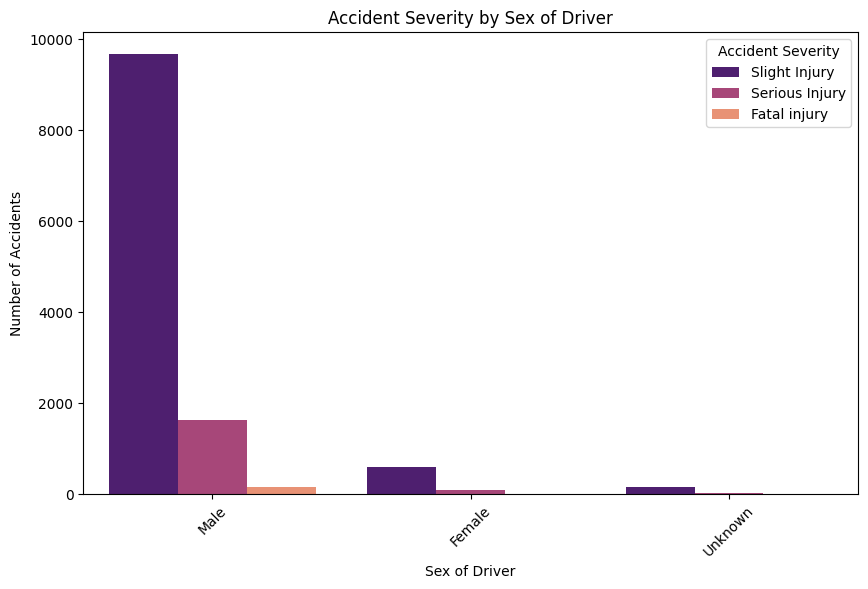

In [14]:
# 9. Analyzing accident severity by sex of driver
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex_of_driver', hue='Accident_severity', data=df, palette='magma')
plt.title('Accident Severity by Sex of Driver')
plt.xlabel('Sex of Driver')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.show()

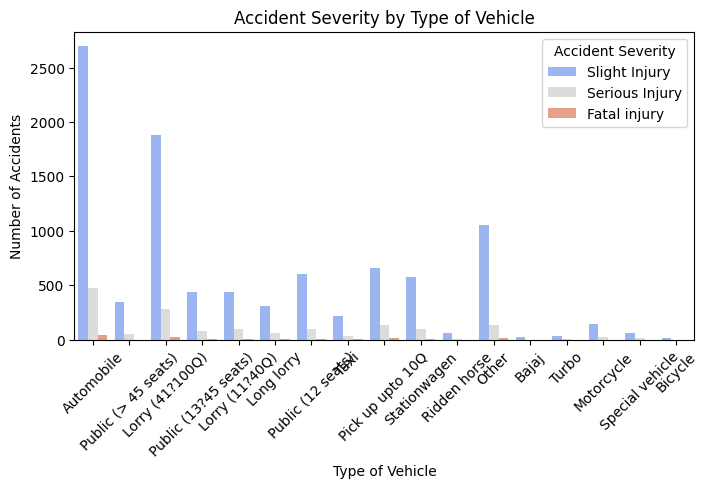

In [15]:
# 10. Analyzing accident severity by type of vehicle
plt.figure(figsize=(8, 4))
sns.countplot(x='Type_of_vehicle', hue='Accident_severity', data=df, palette='coolwarm')
plt.title('Accident Severity by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.show()

In [16]:
plt.savefig('accident_analysis_plots.png')

<Figure size 640x480 with 0 Axes>